# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!ls MNIST

processed  raw


In [4]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [5]:
x_train = x_train.float()

x_train = x_train / 255.

if False:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

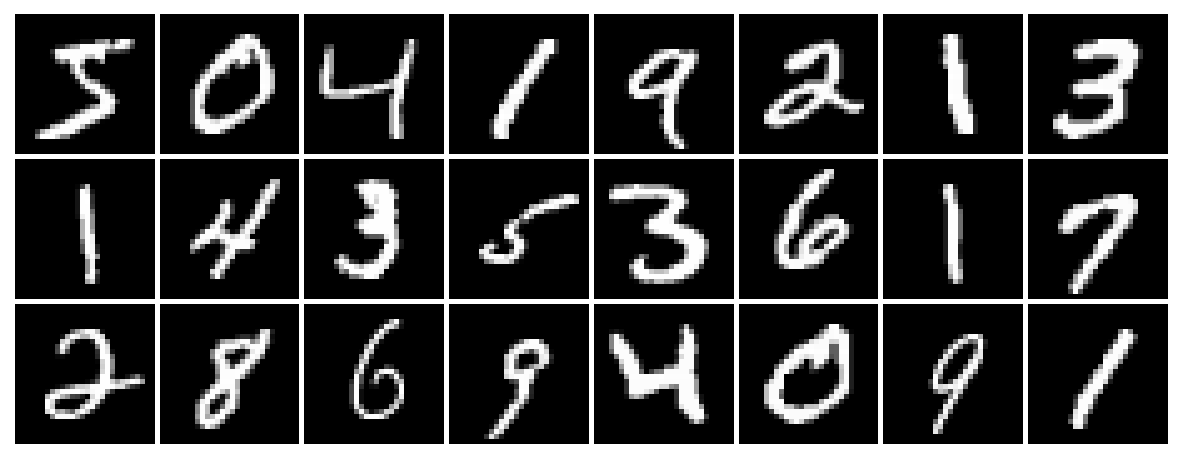

In [6]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


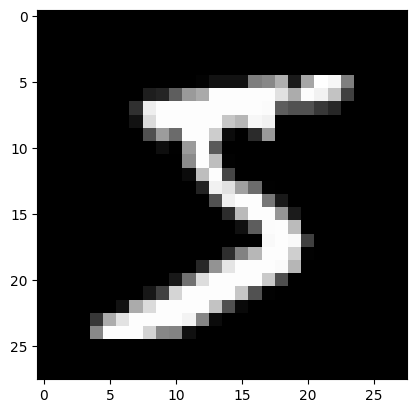

In [7]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

In [8]:
28*28

784

## Modelo

In [35]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

In [10]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.0266,  0.0077,  0.0178,  ...,  0.0287, -0.0216, -0.0353],
                      [ 0.0011, -0.0240,  0.0329,  ..., -0.0182, -0.0060, -0.0277],
                      [-0.0196,  0.0219, -0.0162,  ..., -0.0308, -0.0263,  0.0277],
                      ...,
                      [-0.0219, -0.0083,  0.0019,  ...,  0.0317,  0.0122,  0.0212],
                      [-0.0267, -0.0075,  0.0104,  ..., -0.0121,  0.0153, -0.0150],
                      [ 0.0155,  0.0145, -0.0151,  ..., -0.0199,  0.0178, -0.0332]])),
             ('bias',
              tensor([-0.0295, -0.0130, -0.0045,  0.0053, -0.0192,  0.0250,  0.0140,  0.0258,
                       0.0347, -0.0045]))])

### Testando um predict com poucas amostras

In [11]:
pred = model(Variable(x_train))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1680000x28 and 784x10)

In [12]:
x_train.view(-1, 28*28).shape

torch.Size([60000, 784])

In [13]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[-0.2349, -0.0328, -0.4690, -0.4608, -0.2034, -0.1645,  0.1448,  0.0745,
         -0.1335,  0.0224],
        [-0.1575, -0.0145, -0.1561, -0.3973, -0.0028,  0.1314,  0.0954,  0.1842,
         -0.0193, -0.0142],
        [-0.4153, -0.1314, -0.0863, -0.1010,  0.0472,  0.0141, -0.1377, -0.2975,
          0.0520,  0.1806],
        [-0.1110,  0.0377,  0.0941, -0.1100, -0.1077, -0.0325,  0.0760,  0.0235,
         -0.0255, -0.1169],
        [-0.2837, -0.0242, -0.0289, -0.0916, -0.1606, -0.0159,  0.1583, -0.1193,
          0.2359, -0.0844]], grad_fn=<AddmmBackward0>)

In [14]:
import torch.nn.functional as F
prob = F.softmax(score, dim=1)
prob*100

tensor([[ 8.9746, 10.9843,  7.1014,  7.1597,  9.2622,  9.6288, 13.1189, 12.2292,
          9.9325, 11.6084],
        [ 8.7400, 10.0838,  8.7518,  6.8764, 10.2026, 11.6679, 11.2554, 12.3002,
         10.0354, 10.0864],
        [ 7.1090,  9.4431,  9.8782,  9.7342, 11.2891, 10.9218,  9.3835,  7.9973,
         11.3438, 12.9002],
        [ 9.1684, 10.6388, 11.2553,  9.1781,  9.1987,  9.9169, 11.0535, 10.4885,
          9.9866,  9.1150],
        [ 7.7685, 10.0696, 10.0230,  9.4137,  8.7863, 10.1537, 12.0864,  9.1561,
         13.0613,  9.4813]], grad_fn=<MulBackward0>)

In [15]:
max_prob, max_class = torch.max(prob, dim=1)
max_class

tensor([6, 7, 9, 2, 8])

## Treinamento

### Inicialização dos parâmetros

In [36]:
epochs = 1000
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [ ]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-t86j_xm5
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-t86j_xm5
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.10

In [ ]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.2725, grad_fn=<NllLossBackward0>)

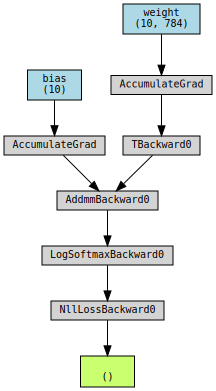

In [ ]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [37]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [38]:
print('Final loss:', loss.item())

Final loss: 0.28427115082740784


### Visualizando gráfico de perda durante o treinamento

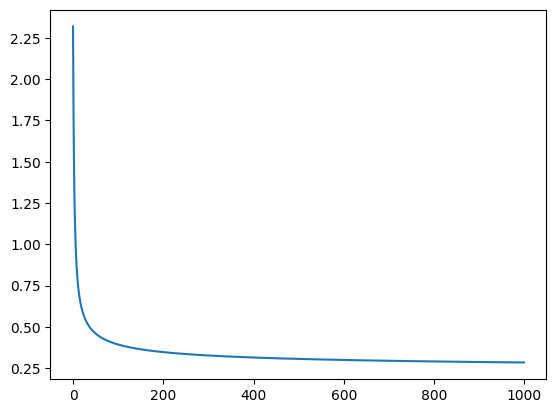

In [39]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [40]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.9210833333333334


### Matriz de confusão com dados de treinamento e teste

In [41]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,5726,1,33,19,13,71,36,26,30,32
1,1,6550,64,31,34,34,18,39,127,33
2,20,28,5326,125,33,44,47,80,62,20
3,13,23,86,5478,8,176,2,20,139,83
4,12,6,93,5,5440,62,48,53,27,171
5,42,32,28,214,3,4719,67,9,145,32
6,42,7,78,30,62,96,5664,3,47,2
7,7,16,86,62,14,20,4,5830,16,176
8,53,67,138,110,36,137,32,14,5179,47


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


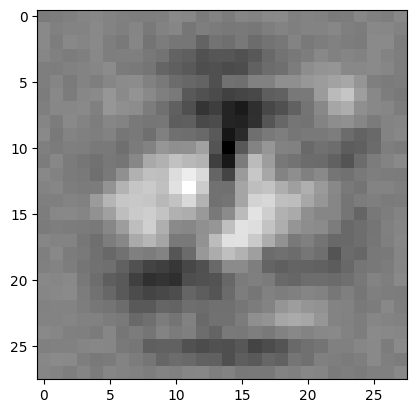

In [44]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 4
plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

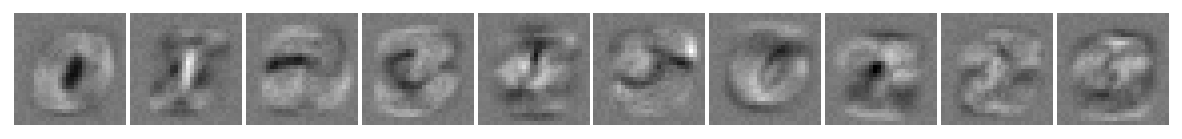

In [45]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [46]:
# 1.

#========= Definição da rede
model = torch.nn.Linear(28*28, 10)

#========= Inicialização dos parâmetros
epochs = 10
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

#========= Laço de treinamento
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # Imprimir época, perda e acurácia
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))


Epoch[1/10], loss: 2.276284, acc: 0.123000
Epoch[2/10], loss: 1.815848, acc: 0.628783
Epoch[3/10], loss: 1.505832, acc: 0.735467
Epoch[4/10], loss: 1.299354, acc: 0.753283
Epoch[5/10], loss: 1.155938, acc: 0.785583
Epoch[6/10], loss: 1.049908, acc: 0.794150
Epoch[7/10], loss: 0.971793, acc: 0.808150
Epoch[8/10], loss: 0.908364, acc: 0.816050
Epoch[9/10], loss: 0.859713, acc: 0.822967
Epoch[10/10], loss: 0.816904, acc: 0.829633


- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[1/100]


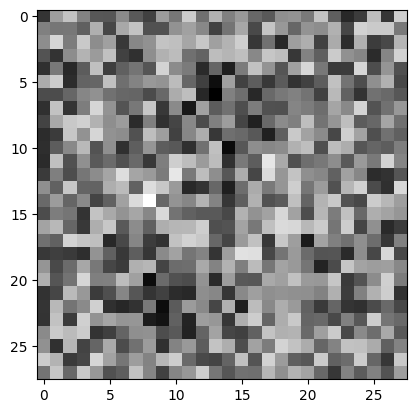

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[2/100]


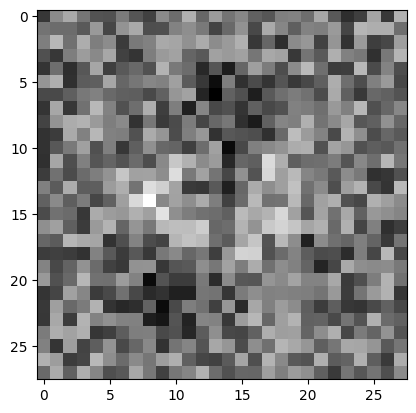

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[3/100]


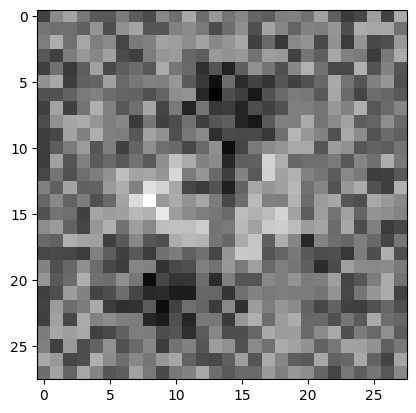

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[4/100]


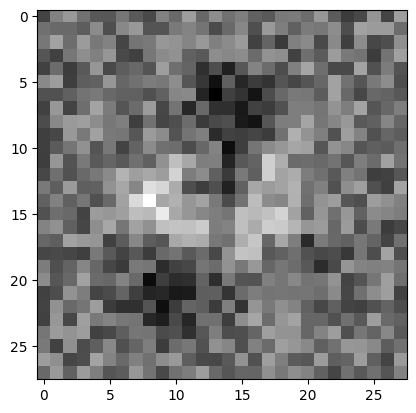

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[5/100]


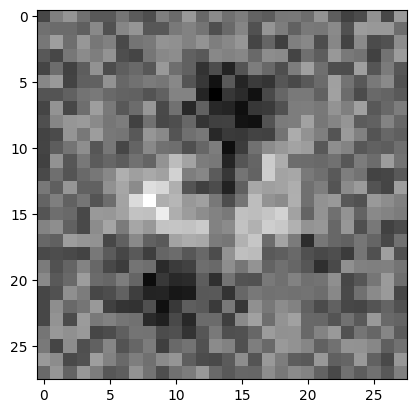

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[6/100]


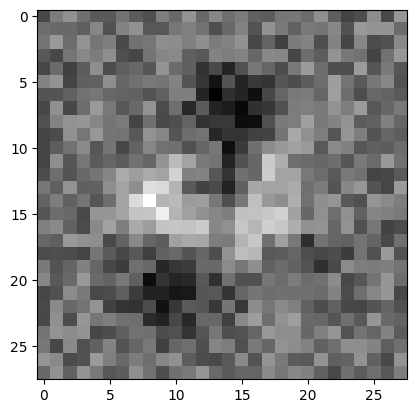

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[7/100]


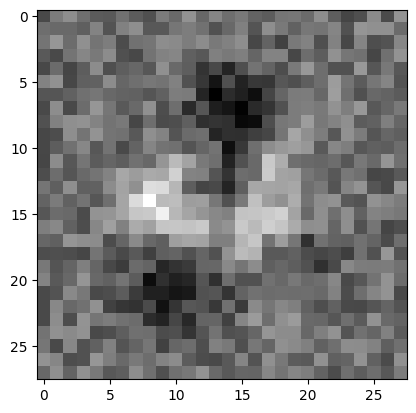

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[8/100]


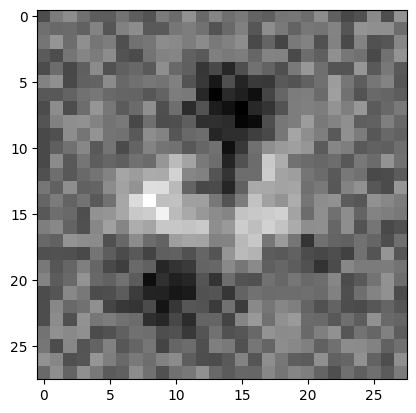

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[9/100]


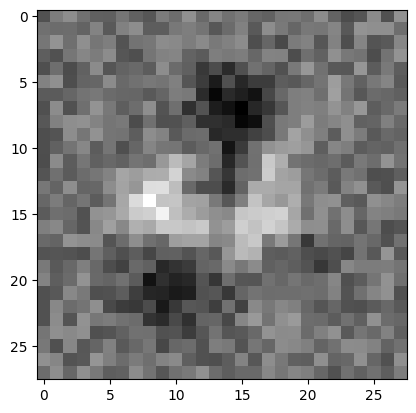

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[10/100]


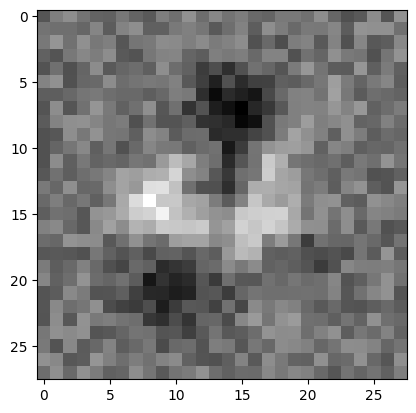

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[11/100]


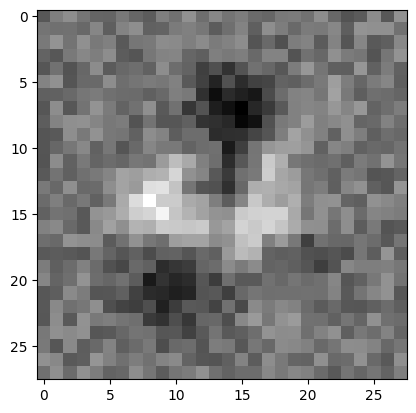

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[12/100]


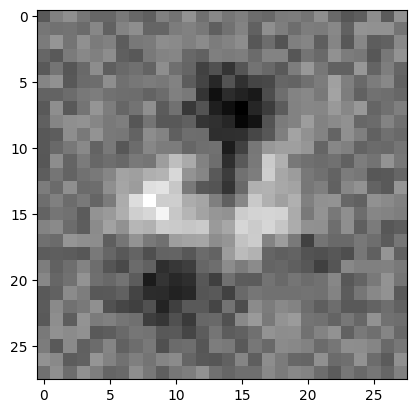

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[13/100]


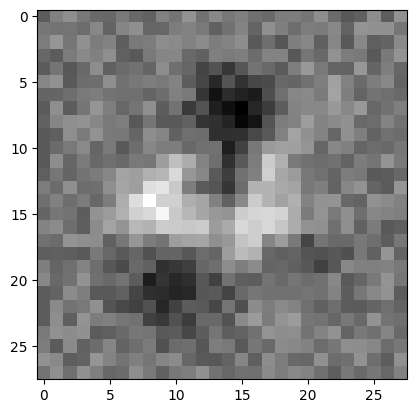

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[14/100]


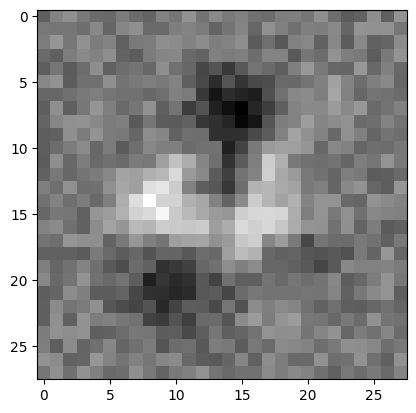

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[15/100]


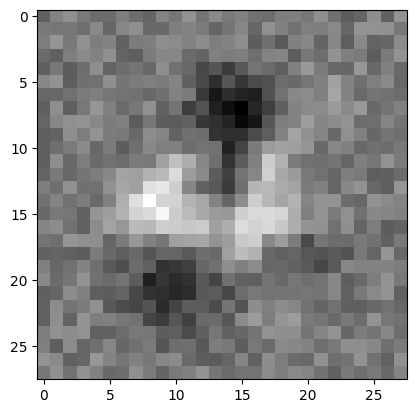

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[16/100]


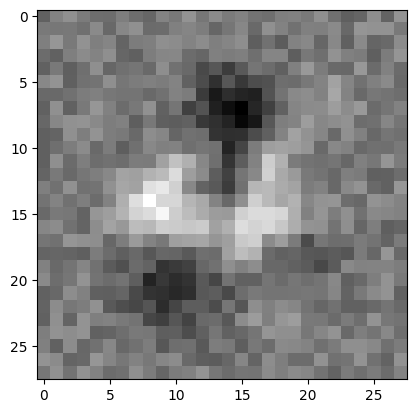

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[17/100]


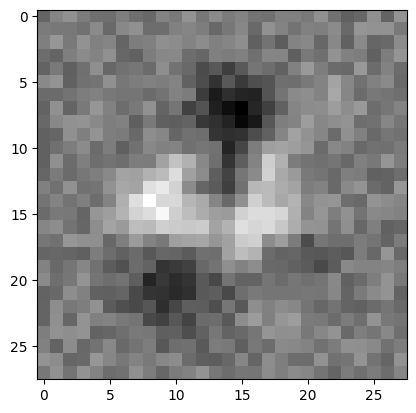

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[18/100]


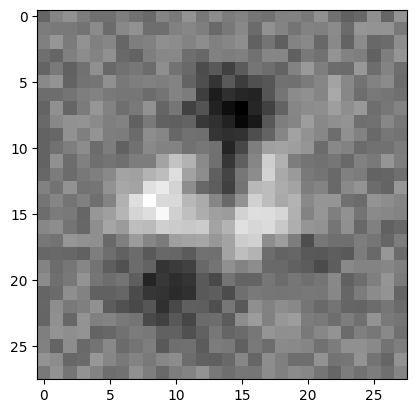

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[19/100]


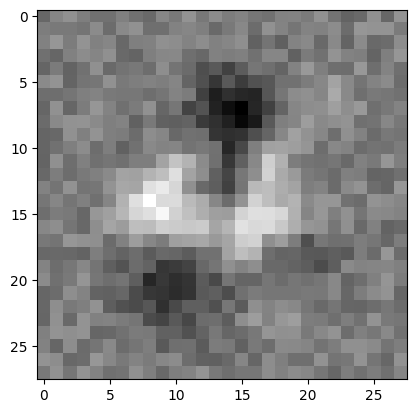

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[20/100]


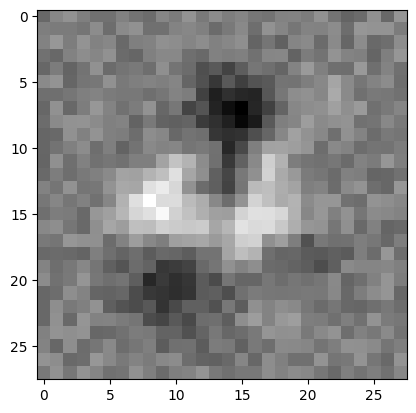

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[21/100]


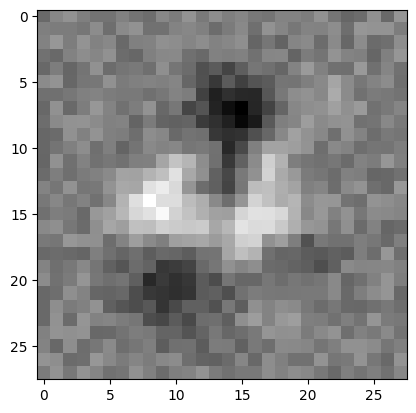

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[22/100]


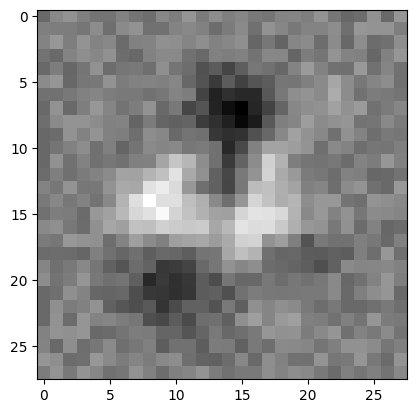

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[23/100]


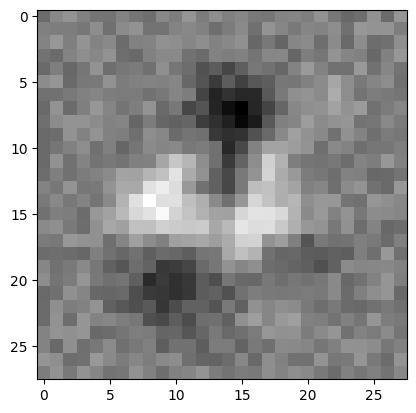

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[24/100]


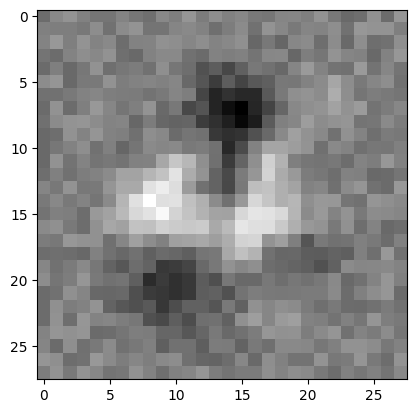

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[25/100]


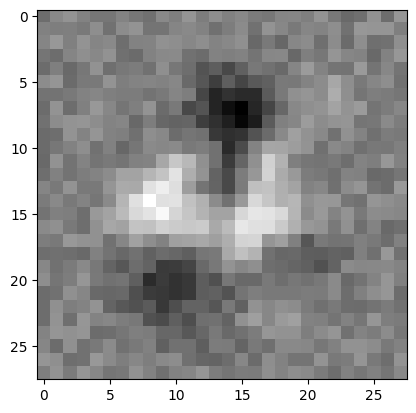

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[26/100]


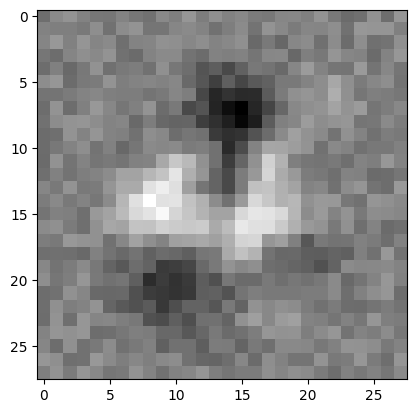

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[27/100]


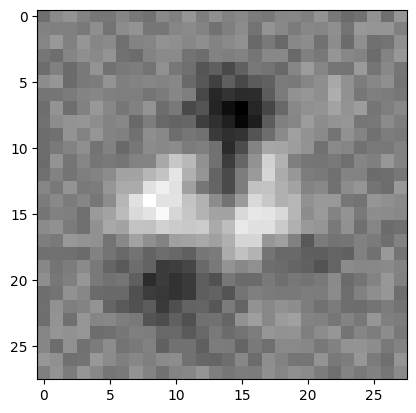

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[28/100]


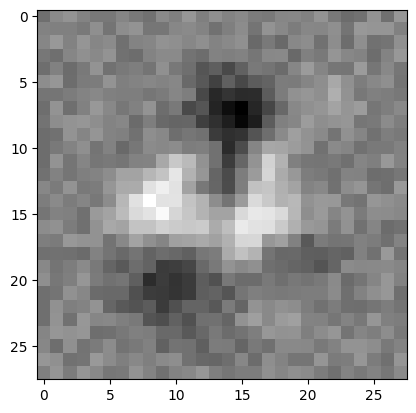

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[29/100]


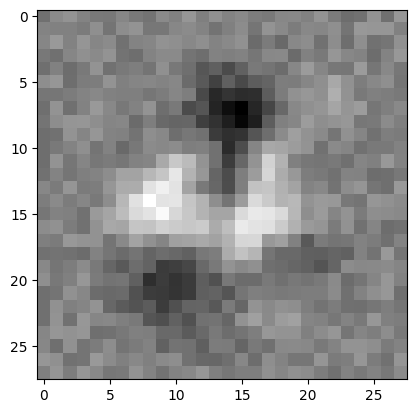

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[30/100]


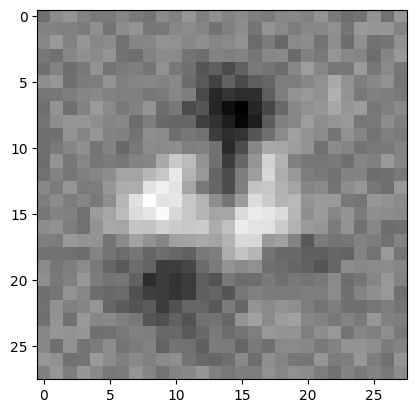

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[31/100]


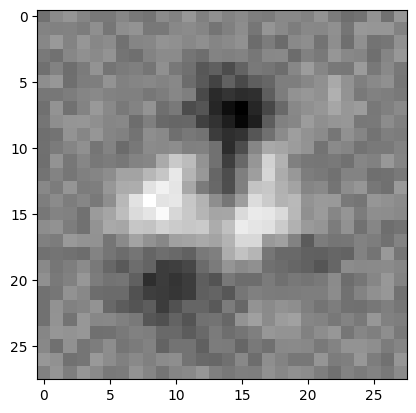

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[32/100]


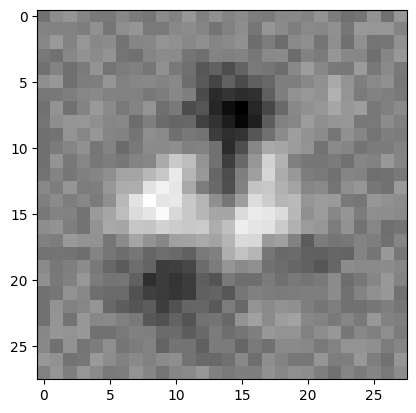

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[33/100]


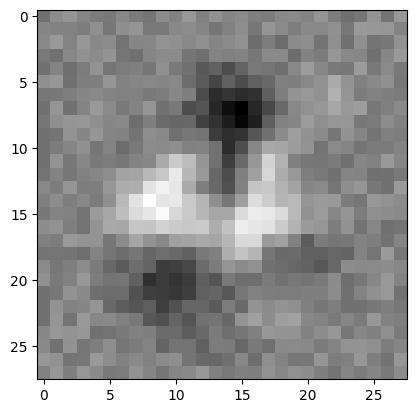

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[34/100]


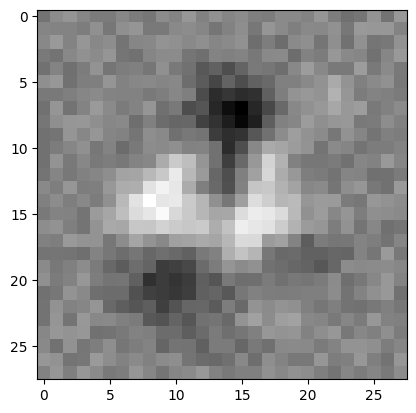

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[35/100]


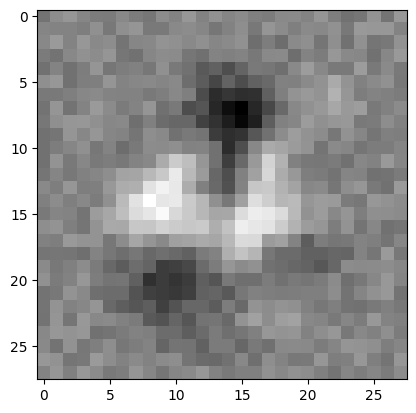

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[36/100]


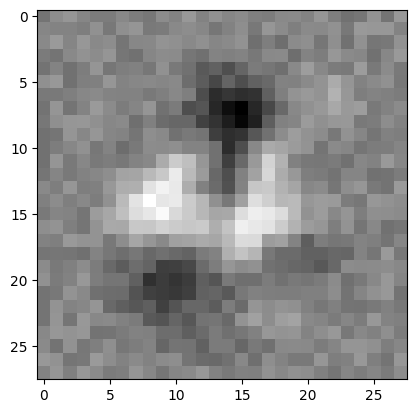

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[37/100]


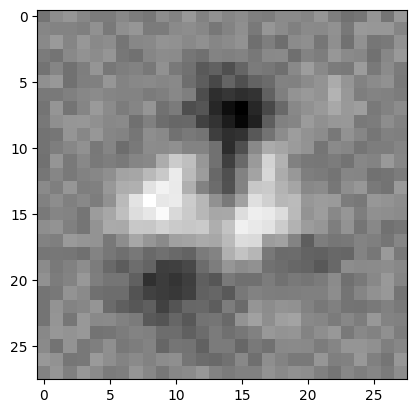

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[38/100]


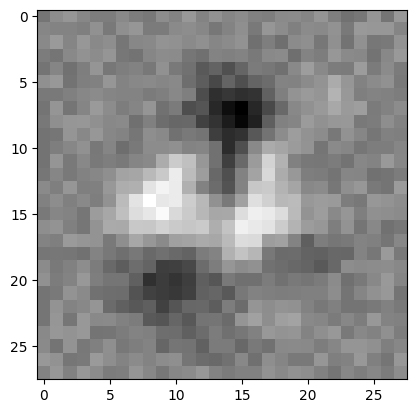

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[39/100]


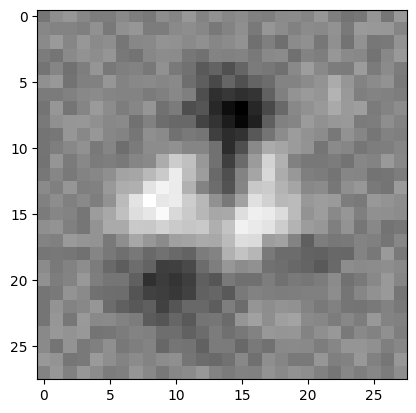

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[40/100]


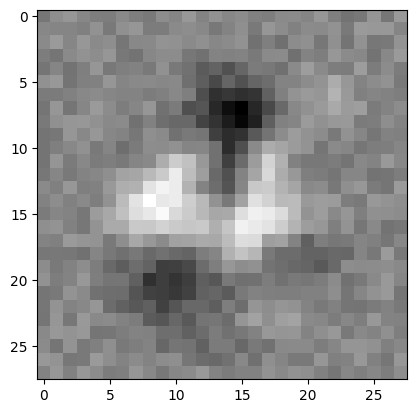

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[41/100]


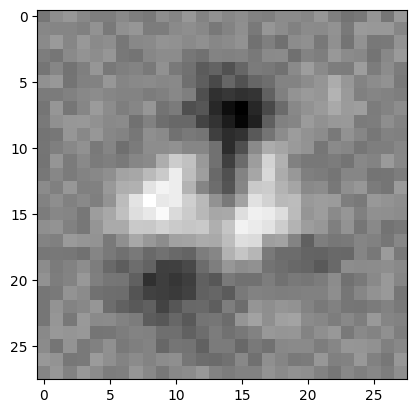

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[42/100]


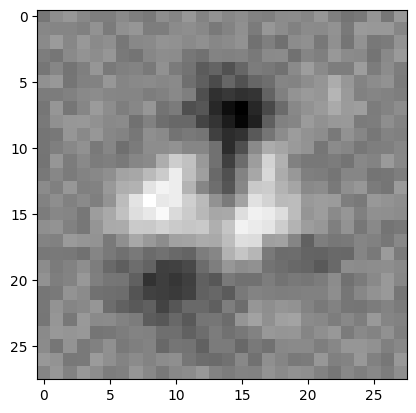

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[43/100]


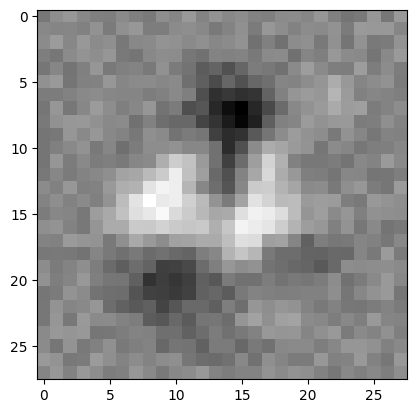

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[44/100]


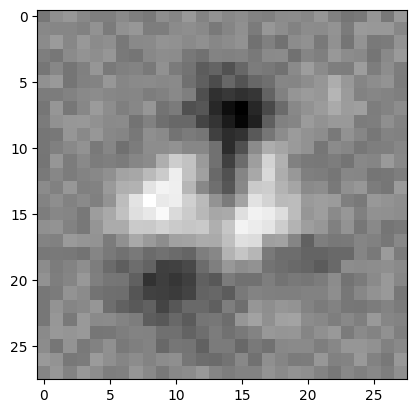

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[45/100]


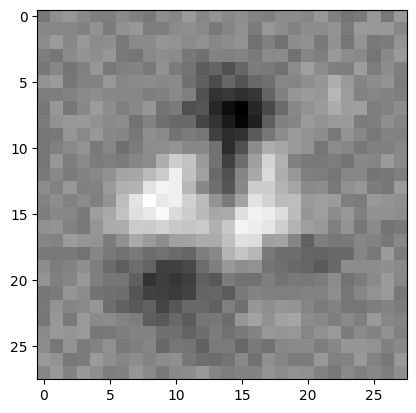

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[46/100]


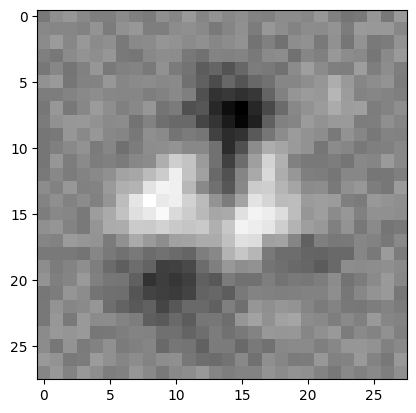

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[47/100]


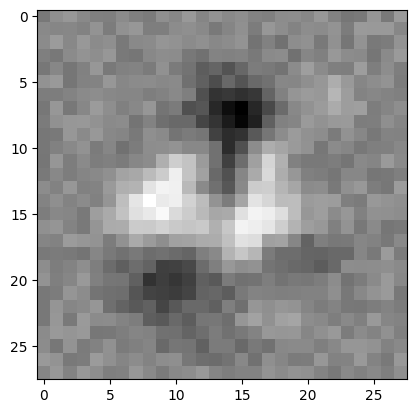

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[48/100]


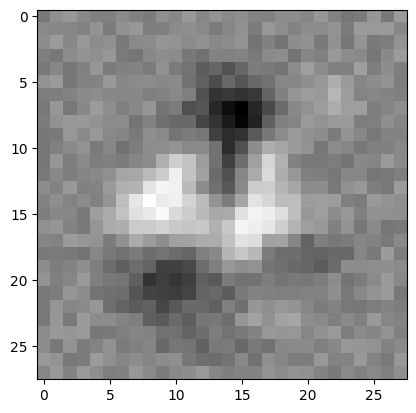

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[49/100]


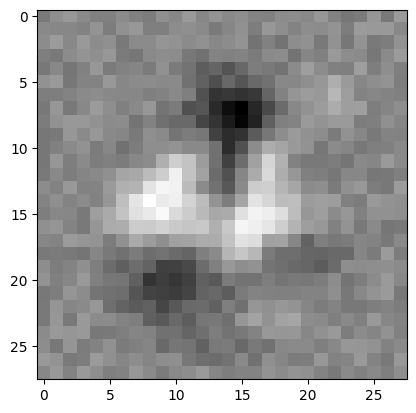

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[50/100]


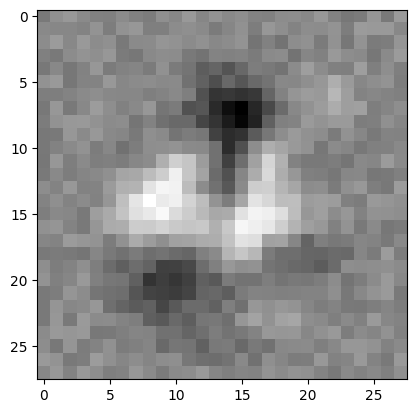

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[51/100]


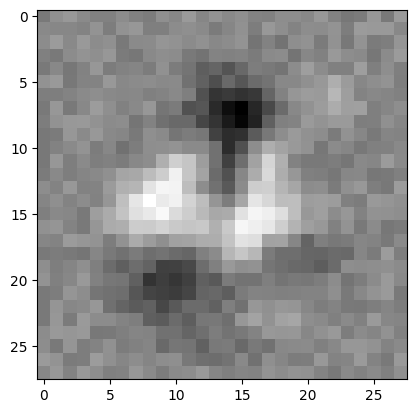

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[52/100]


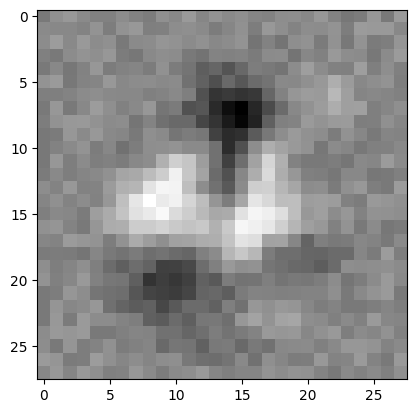

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[53/100]


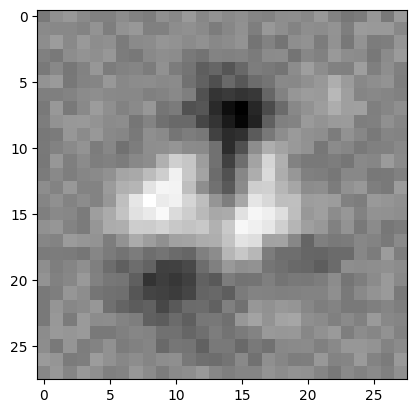

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[54/100]


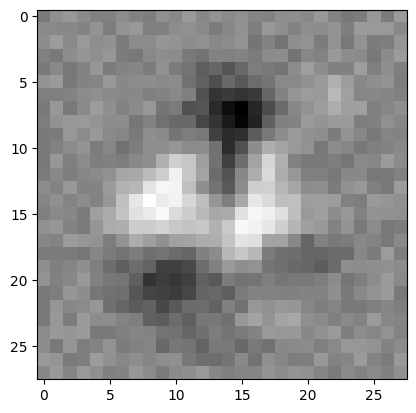

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[55/100]


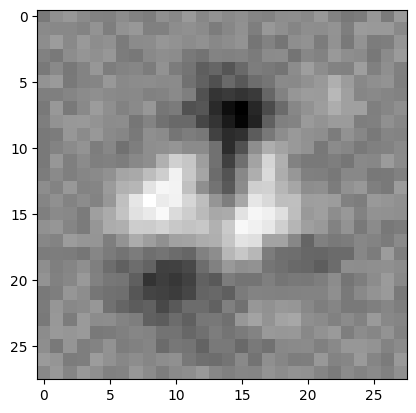

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[56/100]


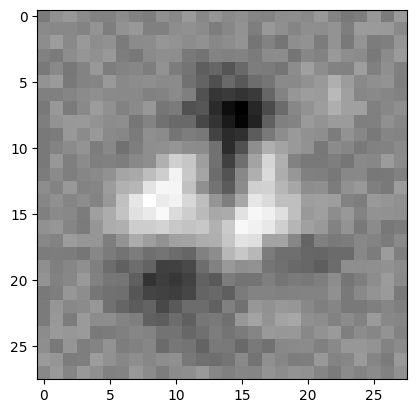

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[57/100]


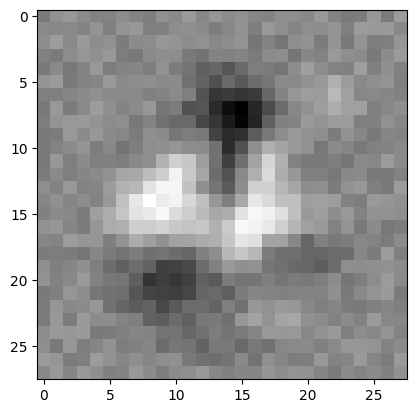

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[58/100]


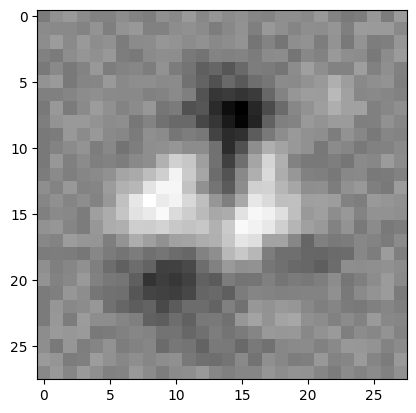

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[59/100]


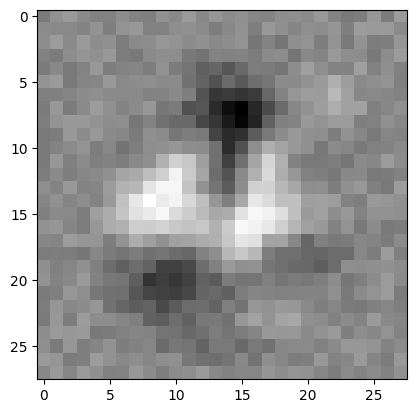

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[60/100]


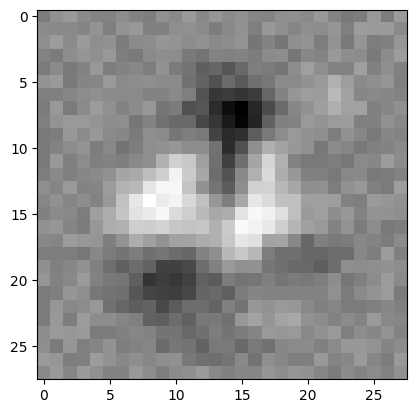

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[61/100]


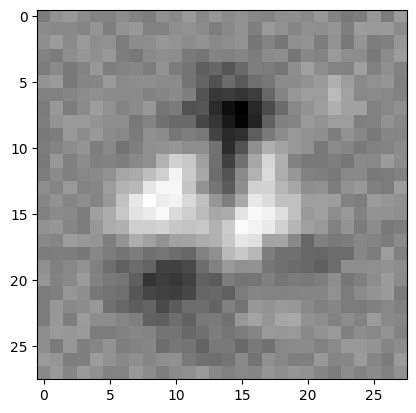

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[62/100]


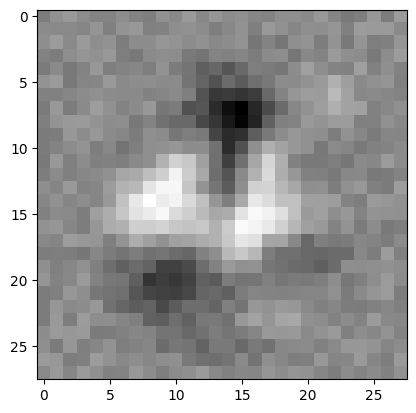

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[63/100]


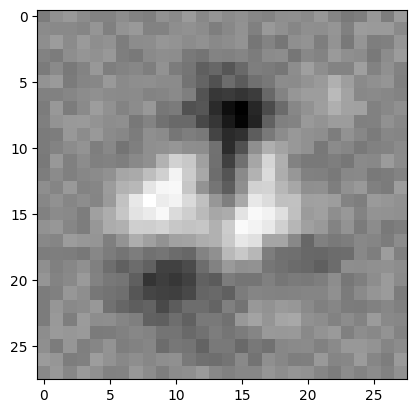

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[64/100]


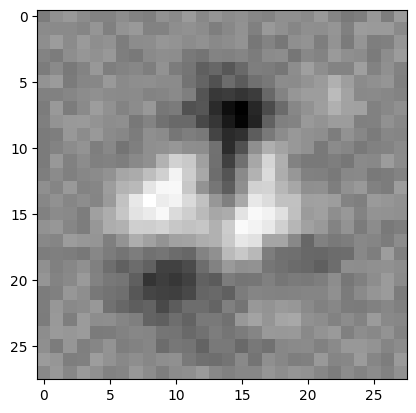

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[65/100]


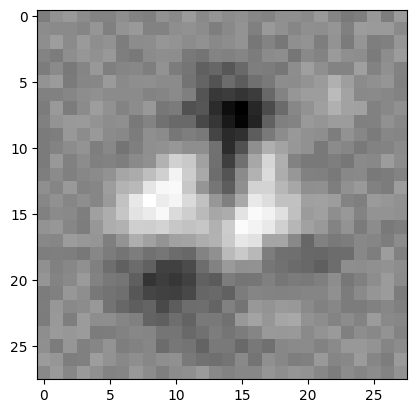

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[66/100]


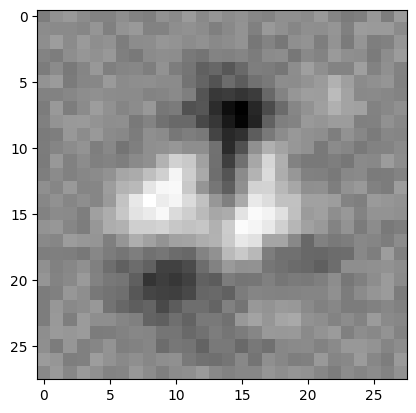

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[67/100]


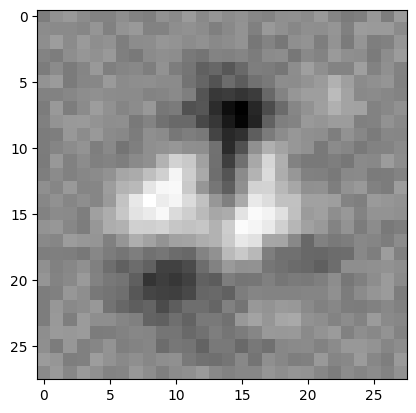

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[68/100]


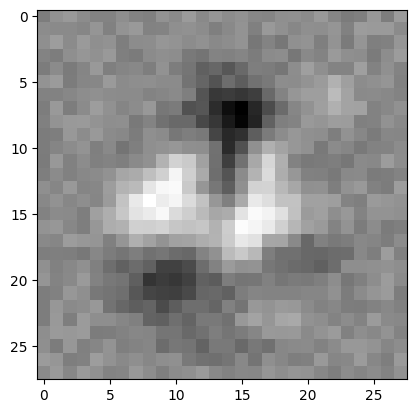

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[69/100]


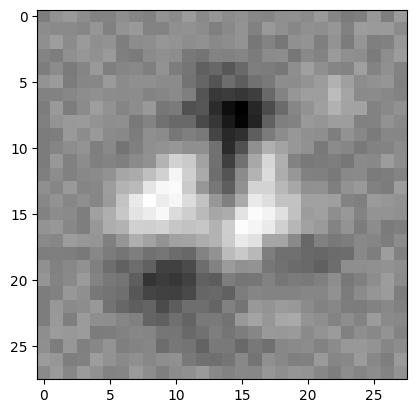

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[70/100]


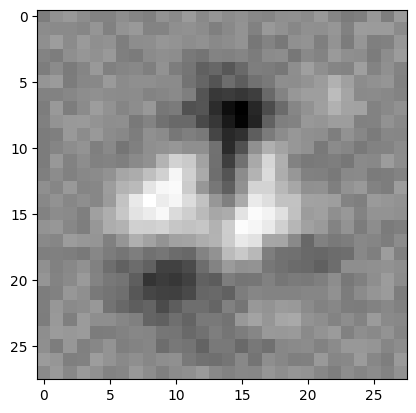

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[71/100]


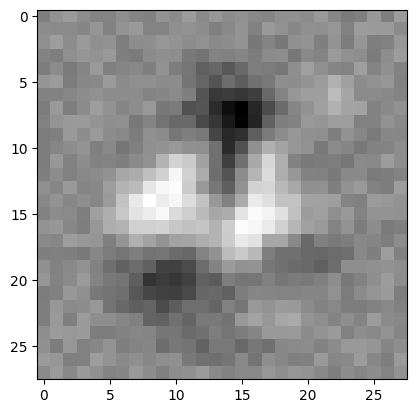

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[72/100]


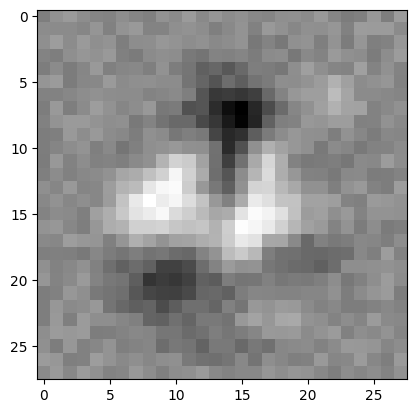

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[73/100]


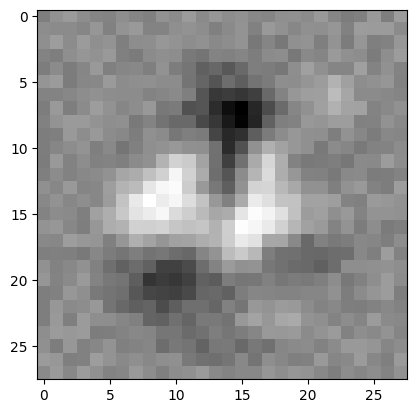

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[74/100]


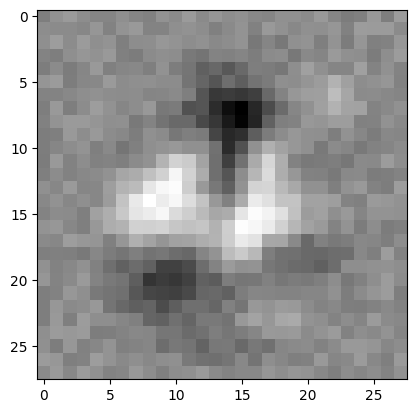

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[75/100]


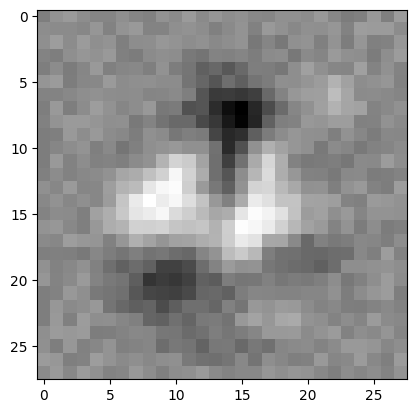

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[76/100]


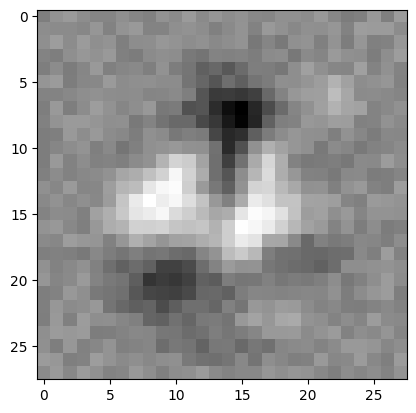

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[77/100]


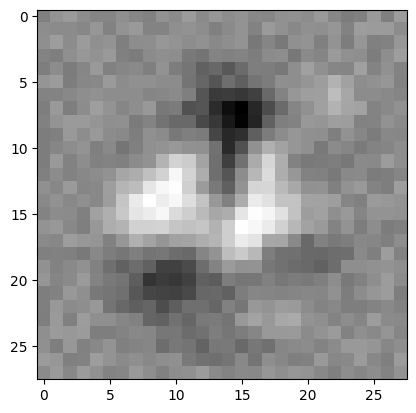

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[78/100]


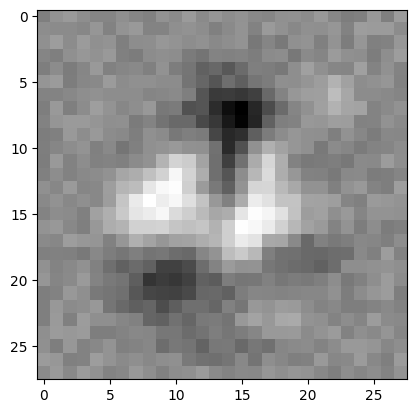

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[79/100]


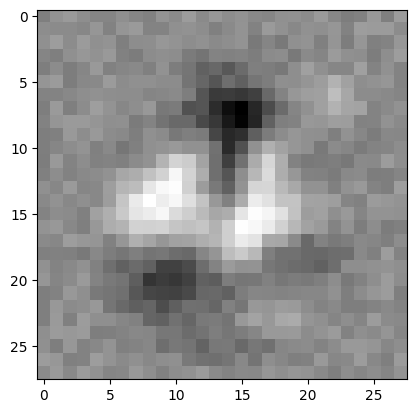

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[80/100]


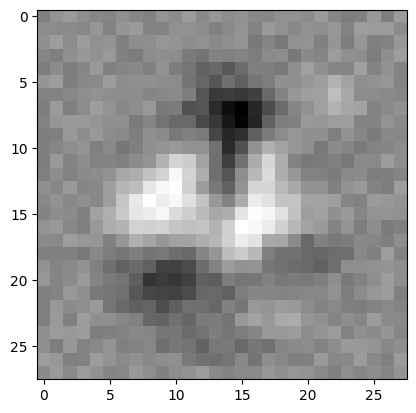

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[81/100]


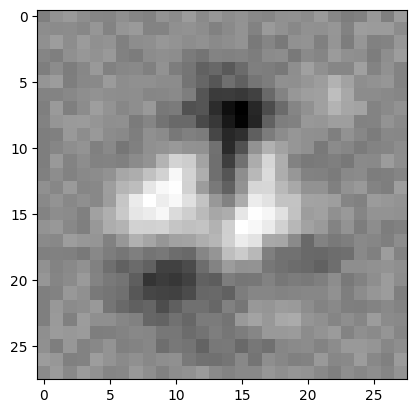

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[82/100]


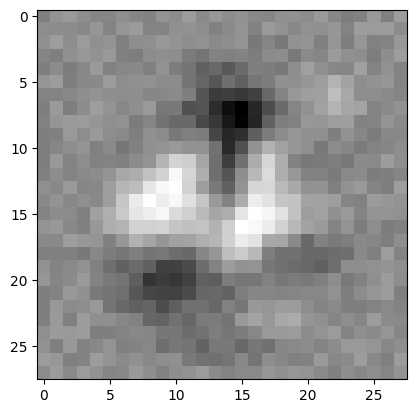

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[83/100]


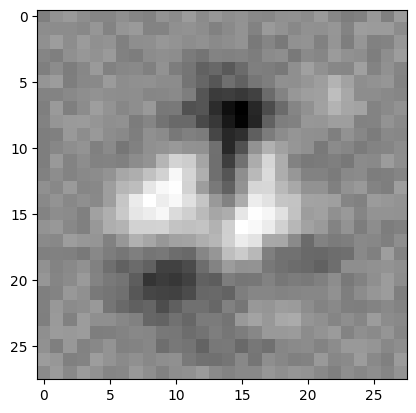

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[84/100]


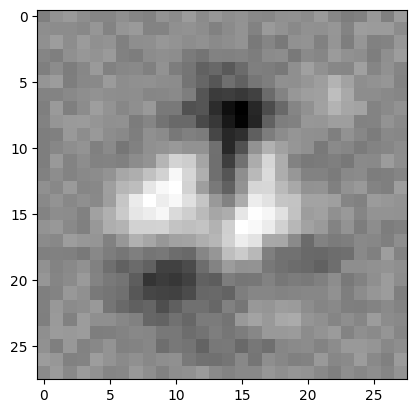

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[85/100]


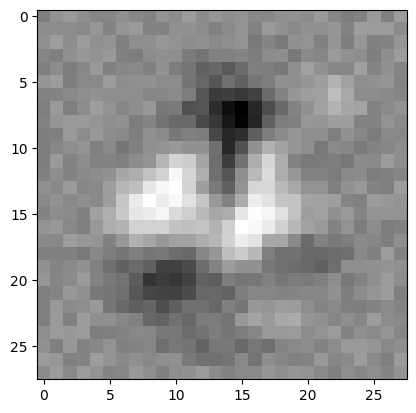

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[86/100]


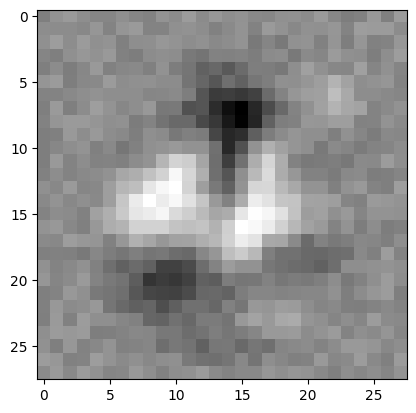

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[87/100]


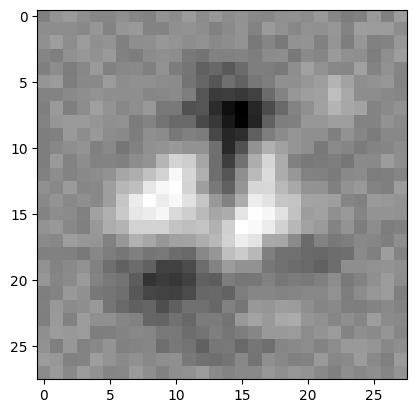

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[88/100]


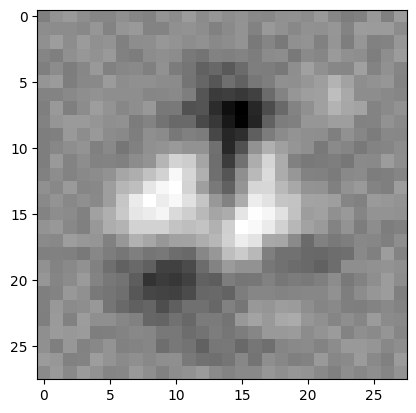

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[89/100]


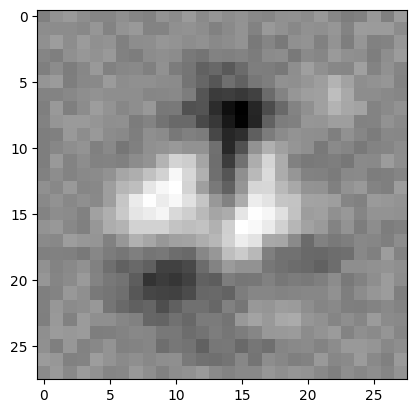

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[90/100]


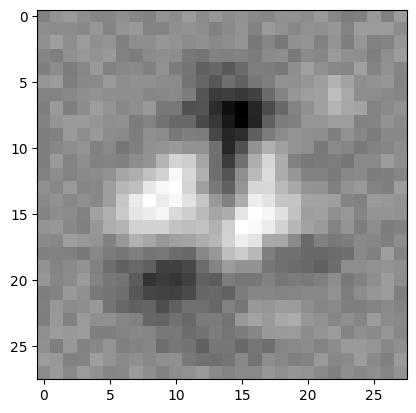

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[91/100]


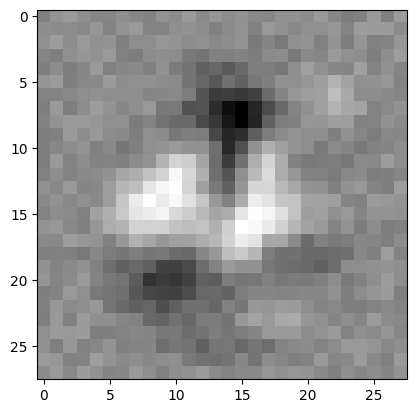

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[92/100]


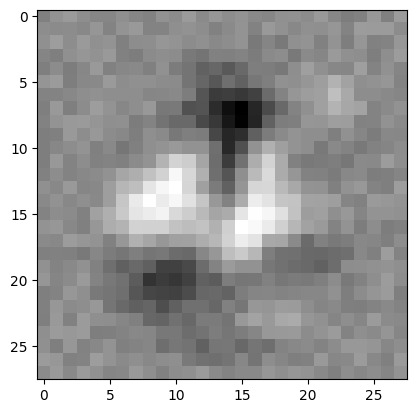

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[93/100]


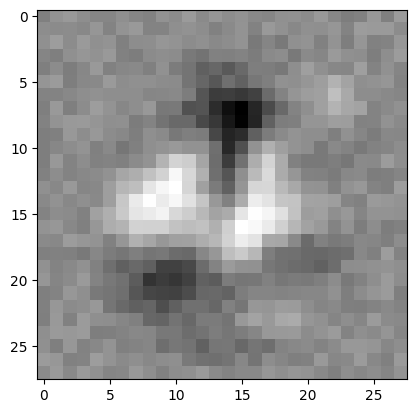

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[94/100]


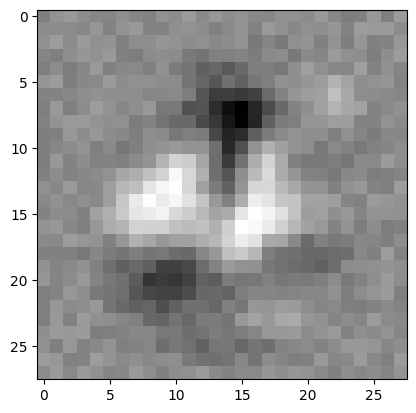

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[95/100]


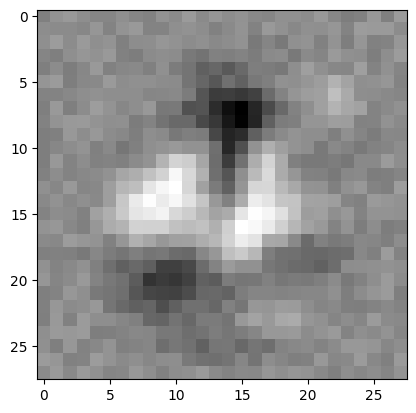

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[96/100]


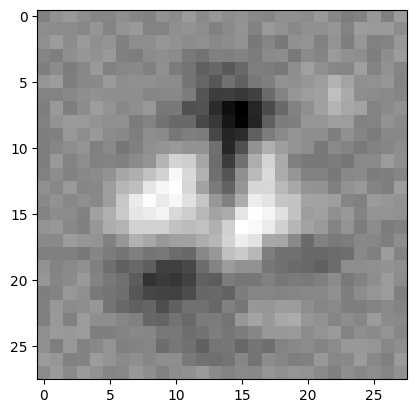

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[97/100]


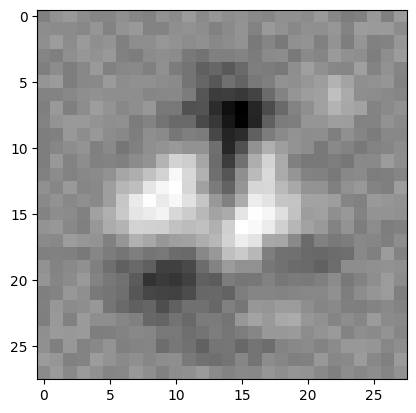

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[98/100]


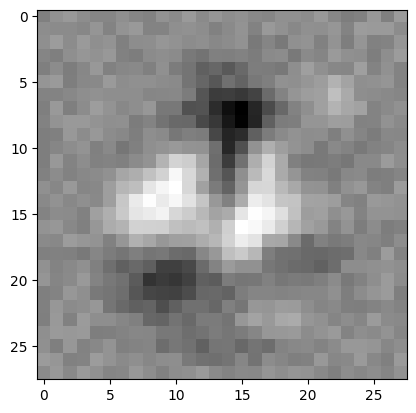

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[99/100]


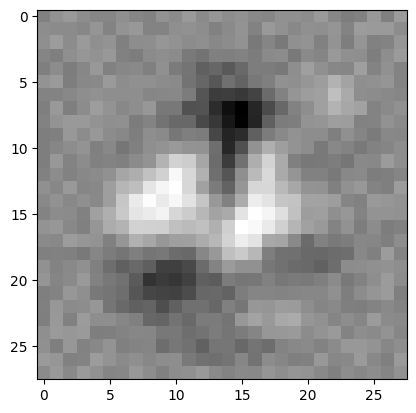

weights: torch.Size([10, 784])
bias:    torch.Size([10])
Epoch[100/100]


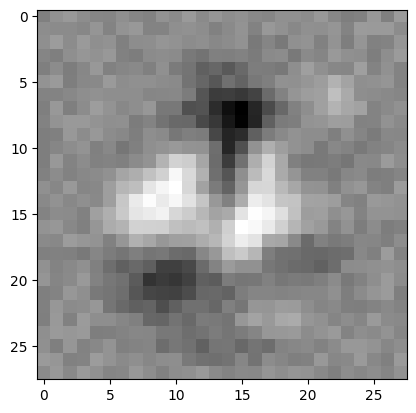

In [53]:
# 2.

#========= Definição da rede
model = torch.nn.Linear(28*28, 10)

#========= Inicialização dos parâmetros
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

#========= Laço de treinamento
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # Exibir valores dos gradientes da classe do dígito 4 ao fim de cada época:

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Imprimir época:
    print('Epoch[{}/{}]'.format(i+1, epochs))

    # Visualizando pesos da classe 4
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()



<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
**R:** (60000, 28*28)
2. Qual é o shape da saída da rede?
**R:** (60000, 10)
3. Qual é o número total de parâmetros da rede, incluindo o bias?
**R:** 784*10 + 10 = 7850

# Aprendizados
